# Problem set 1: Printing and plotting

**Table of contents**<a id='toc0_'></a>    
- 1. [define function](#toc1_)    
- 2. [print to screen (table)](#toc2_)    
- 3. [write the output to `table_output.txt`](#toc3_)    
- 4. [read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2d plot indifference curves](#toc5_)    
- 6. [3d plots](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'-'})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $\alpha=0.5$ and $\beta=1$.

In [ ]:
def u_func(x1,x2,alpha=0.50,beta=1):
    return (alpha*x1**(-beta) +(1-alpha)*x2**(-beta))**(-1/beta)
#hej



## 2. <a id='toc2_'></a>[print to screen (table)](#toc0_)

In [3]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [4]:
# update this code

def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}' # kolonneoverskrift
    for j, x2 in enumerate(x2_vec): #bruger lister af x2 værdier 
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec): #bruger listen af x1 værdier 
        text += f'{i:3d}'  # rækkeoverskrift
        for x2 in x2_vec:
            u_val = u_func(x1, x2)
            text += f'{u_val:6.3f}'
        text += '\n'  # line shift 
    
    # d. print
    return text

table = gen_table(x1_vec,x2_vec,u_func)
print(table)

        0     1     2     3     4
  0 1.050 1.162 1.442 1.479 1.569
  1 1.162 1.300 1.661 1.711 1.832
  2 1.442 1.661 2.300 2.396 2.641
  3 1.479 1.711 2.396 2.500 2.768
  4 1.569 1.832 2.641 2.768 3.100



In [5]:
# from A1 import u_func as u_func_answer
# from A2 import gen_table as gen_table_answer
# print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

## 3. <a id='toc3_'></a>[write the output to `table_output.txt`](#toc0_)

In [6]:
# write your code here
with open('table_output.txt', 'w') as f: # 'w' is for 'write'
    f.write(table)

## 4. <a id='toc4_'></a>[read `table_output.txt` and print content to screen](#toc0_)

In [7]:
with open('table_output.txt', 'r') as f: # 'r' is for 'read'
    
    # loading ALL file content into the object lines
    lines = f.readlines()
    
    # printing each loaded line by loop
    for line in lines:
        print(line,end='') # end='' removes the extra lineshift print creates

        0     1     2     3     4
  0 1.050 1.162 1.442 1.479 1.569
  1 1.162 1.300 1.661 1.711 1.832
  2 1.442 1.661 2.300 2.396 2.641
  3 1.479 1.711 2.396 2.500 2.768
  4 1.569 1.832 2.641 2.768 3.100


## 5. <a id='toc5_'></a>[2d plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

In [8]:
# these values were used
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

# write your code here

def cx2_fun(x1,u,alpha=0.5,beta=1.0):
    
    if np.log(x1) > np.log(u) + np.log(alpha)/beta: # betingelse 
        return ((u**(-beta) - alpha*x1**(-beta))/(1-alpha))**(-1/beta) #funktion 
    else:
        return np.nan  # Return NaN hvis betingelsen ikke er opfyldt

Produce a figure like the one below and save to disc.

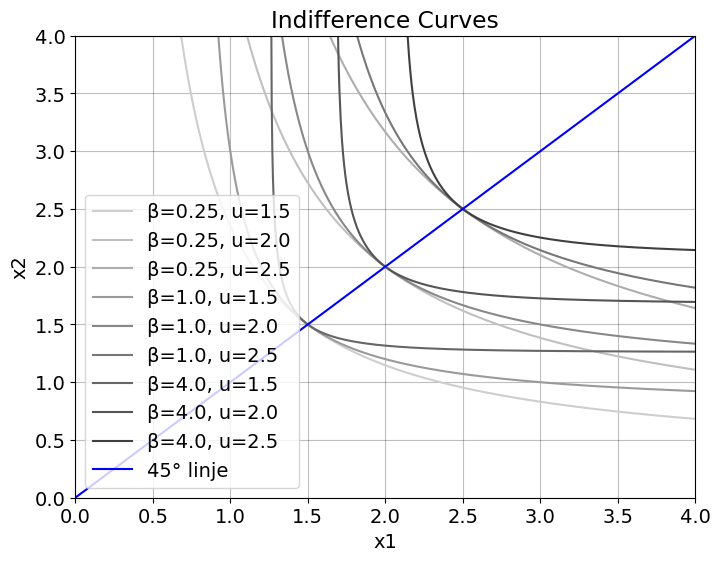

In [9]:
# Opretter plot-funktion
def plot(alpha, betas, uvals):
    # Simpel version af plottet
    x1_plot = np.linspace(0.1, 4, 1000) # oprette 1000 x1-værdier mellem 0.1 og 4

    plt.figure(figsize=(8, 6)) # Opretter en figur og angiver størrelsen

    # Definer grå farver
    colors_greys = plt.cm.Greys(np.linspace(0.3, 0.8, len(betas) * len(uvals)))

    # Plot for hver kombination af beta og u
    color_index = 0  # Tæller for farver
    for beta in betas: #gemmer beta værdierne fra tidligere 
        for u in uvals: #gemmer beta værdierne fra tidligere
            x2_values = [] #opretter tomme lister 
            x1_valid = [] #opretter tomme lister 
            
            for x1 in x1_plot:
                x2 = cx2_fun(x1, u, alpha, beta) # Beregner x2 for denne x1-værdi ved funktion fra tidligere kode 
                if not np.isnan(x2): 
                    x2_values.append(x2)
                    x1_valid.append(x1)
            
            if x1_valid:  # Kun plot hvis der er gyldige punkter
                plt.plot(x1_valid, x2_values, 
                        color=colors_greys[color_index], 
                        label=f'β={beta}, u={u}')
                color_index += 1  # Næste farve til næste kurve

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Indifference Curves')

    plt.plot([0, 4], [0, 4], color='blue', linestyle='-', label='45° linje') # min 45 grader linje 
    
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.grid(True)
    plt.savefig('A5_indifference_curves.png')
    plt.show()

# Kalder funktionen
plot(alpha, betas, uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

## 6. <a id='toc6_'></a>[3d plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_countour`, `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

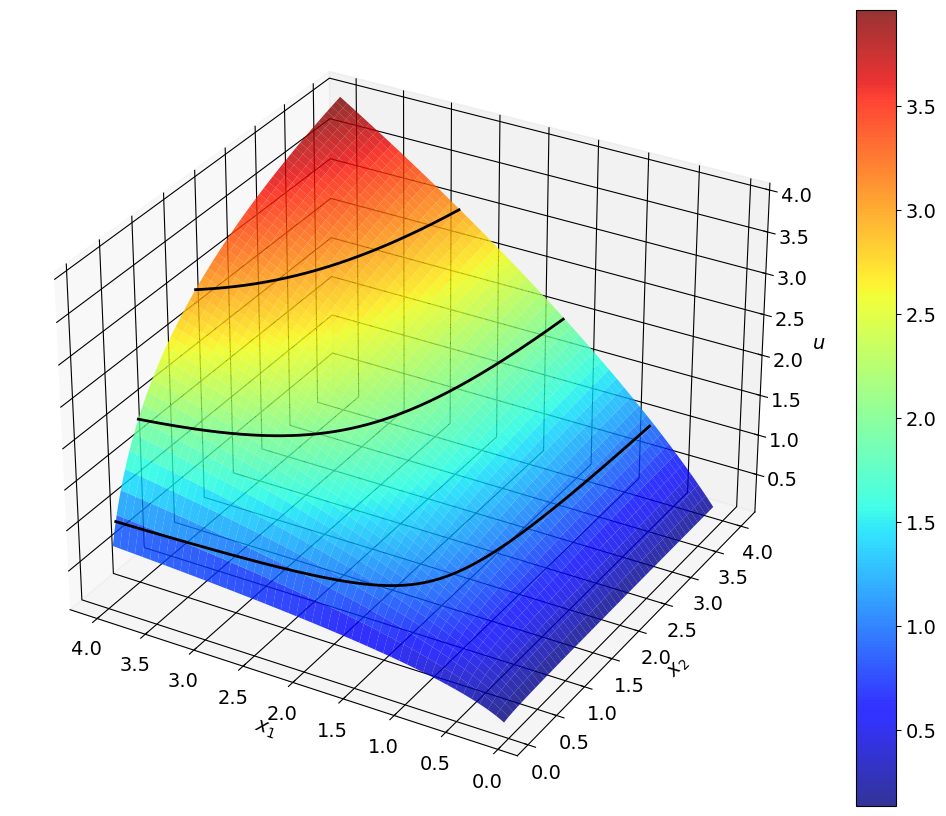

In [10]:
# Parametre
alpha = 0.75
beta = 0.5
x1_vec = np.linspace(0.1,4,1000)   # x1-akse
x2_vec = np.linspace(0.1,4,1000)   # x2-akse
uvals = [1.0,2.0,3.0]              # nytteniveauer til indifferenskurver

# a. beregn riste og nytte
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')   # 2D-riste
u_grid = u_func(x1_grid,x2_grid,alpha=alpha,beta=beta)       # nytteflade i højden

# b. plot setup
fig = plt.figure(figsize=(10, 8))              # opret figur
ax = fig.add_subplot(1,1,1,projection='3d')    # 3D akse

# i. tegn overflade
h = ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet, alpha=0.8) # nytteflade
fig.colorbar(h)   # farveskala

# ii. indifferenskurver
for uval in uvals:
    I = np.log(x1_vec) > np.log(uval) + np.log(alpha)/beta  # filter på x1
    x1_vec_ = x1_vec[I]
    
    x2_vec_ = []   # tom liste til x2 værdier
    for x1_val in x1_vec_:                                 # beregn x2 punktvis
        x2_val = cx2_fun(x1_val, uval, alpha=alpha, beta=beta)
        x2_vec_.append(x2_val)
    x2_vec_ = np.array(x2_vec_)
    
    valid_mask = ~np.isnan(x2_vec_)     # fjern NaN
    x1_vec_valid = x1_vec_[valid_mask]
    x2_vec_valid = x2_vec_[valid_mask]
    
    if len(x1_vec_valid) > 0:
        J = x2_vec_valid < x2_vec.max()                     # klip til akseområde
        uval_vec_ = uval * np.ones_like(x2_vec_valid[J])    # z-koordinat = konstant u
        ax.plot(x1_vec_valid[J], x2_vec_valid[J], uval_vec_, 
                lw=2, color='black', zorder=99)             # tegn kurven i 3D

# c. akse labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$u$')

# d. layout
ax.invert_xaxis()          # vend x1-akse
fig.tight_layout(pad=0.1)  # kompakt layout

plt.show()   # vis figur
